# Sprint 6

## Problem 1

In [4]:
def gini_impurity(n, c1_n):
    a = 0
    for i in c1_n:   
        a += (i/n) ** 2
    gini=1 - a 
    return gini

In [7]:
list_C=[15.0 ,15.0]
gini_impurity(30, list_C)

0.5

In [9]:
gini_impurity(45,[15, 15, 15])

0.6666666666666667

In [10]:
gini_impurity(30,[18, 12])

0.48

In [11]:
gini_impurity(30,[30, 0])

0.0

## Problem 2

In [19]:
import numpy as np
def information_gain(ln_class1,ln_class2):
    n1 = sum(ln_class1)
    n2 = sum(ln_class2)
    p_sample = n1 + n2
    p_class = ln_class1 + ln_class2
    
    p_gini = gini_impurity(p_sample, p_class)
    gini_n1 = gini_impurity(n1, ln_class1)
    gini_n2 = gini_impurity(n2, ln_class2)
    
    IG = p_gini - ((n1/p_sample)*gini_n1) - ((n2/p_sample)*gini_n2)
    
    return IG

In [20]:
information_gain(np.array([10,30]),np.array([20,5]))

0.14319526627218937

## Problem 3, 4 and 5

In [26]:
import scipy.stats as stats
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[50:,:]
y = iris.target[50:]
X = X[:,[2,3]]
y = np.where(y == 1, 1, 0)
y = y.reshape(100,1)
iris = np.hstack((y,X))
np.unique(iris[:,0])

array([0., 1.])

In [35]:
class ScratchDecesionTreeClassifier():

    def _gini_impurity(self, data, target):
        a = 0
        for i in np.unique(target):    
            a += (len(target[target[:,0]==i]) / len(data)) ** 2      
        self.gini = 1 - a
        return self.gini
    
    def _gini_info(self, data, target):
        n = len(data)
        IG = self._gini_impurity(data, target) - len(self.data_left) / n * self._gini_impurity(self.data_left, self.target_left) - len(self.data_right) / n * self._gini_impurity(self.data_right, self.target_right) 
        return IG
    
    
    def fit(self, data, target):
        self.list_gini_info_max = []
        self.threshold_max = []
      
        for i in range(data.shape[1]):     
            self.list_gini_info = []    
            self.Threshold = []
            
            for j in np.unique(data[:,i]):      
                self.Threshold.append(j)      
                self.data_right = data[data[:,i] >= j]                
                self.target_right = target[data[:,i] >= j]             
                self.data_left = data[data[:,i] < j]               
                self.target_left = target[data[:,i] < j]
                self.list_gini_info.append(self._gini_info(data, target)) 
                
            self.list_gini_info_max.append(max(self.list_gini_info))
            self.ind = self.list_gini_info.index(max(self.list_gini_info)) 
            self.threshold_max.append(self.Threshold[self.ind])  
            
        self.ind2 = self.list_gini_info_max.index(max(self.list_gini_info_max)) 
        self.dicision_threshold = self.threshold_max[self.ind2]
        self.Greater_label = stats.mode(target[data[: ,self.ind2] >= self.dicision_threshold]).mode 
        self.Less_label = stats.mode(target[data[: ,self.ind2] < self.dicision_threshold]).mode 
        
    def predict(self, data):
        self.y_pred = np.zeros(data.shape[0]).reshape(data.shape[0], 1)
        self.y_pred[data[: ,self.ind2] >= self.dicision_threshold] = self.Greater_label
        self.y_pred[data[: ,self.ind2] < self.dicision_threshold] = self.Less_label
        return self.y_pred

In [36]:
ScDt = ScratchDecesionTreeClassifier()
ScDt.fit(X, y)

In [37]:
ScDt.predict(X)

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [41]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)
ScDt = ScratchDecesionTreeClassifier()
ScDt.fit(X_train, y_train)
y_pred = ScDt.predict(X_test)

In [42]:
print("{}".format(precision_score(y_test,y_pred)))
print("{}".format(recall_score(y_test,y_pred)))
print("{}".format(f1_score(y_test,y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.7333333333333333
0.846153846153846
[[15  0]
 [ 4 11]]


## Problem 6

- Let's visualize the decision area

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o", "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

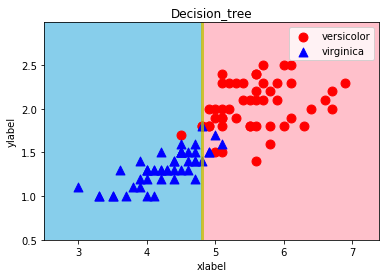

In [45]:
decision_region(X = X, y = y[:,0], model = ScDt, step=0.01, title='Decision_tree', xlabel='xlabel', ylabel='ylabel')

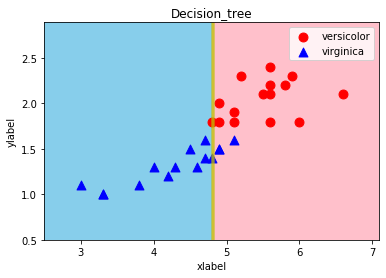

In [47]:
decision_region(X = X_test, y = y_test[:,0], model = ScDt, step=0.01, title='Decision_tree', xlabel='xlabel', ylabel='ylabel')